<a href="https://colab.research.google.com/github/Manishachermadurai/MachineLearning/blob/main/Vgg16_Parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install keras
!pip install tensorflow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

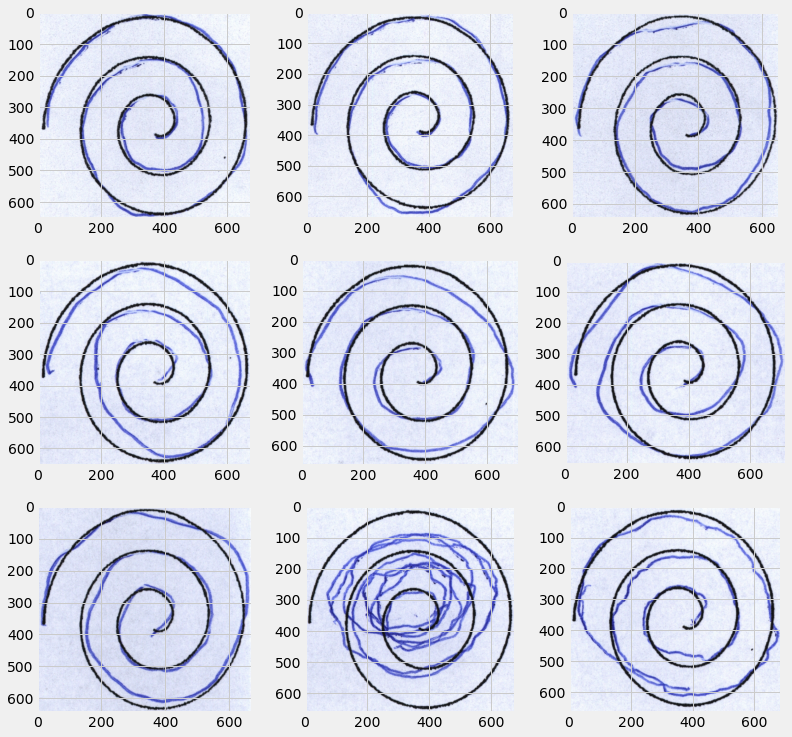

In [ ]:
fig = plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/dataset/parkinson/spiral/training/healthy/"+
                  os.listdir("/content/gdrive/My Drive/dataset/parkinson/spiral/training/healthy")[i])
    plt.imshow(img)
fig.canvas.manager.set_window_title('Training Healthy Spiral images')
plt.show() 

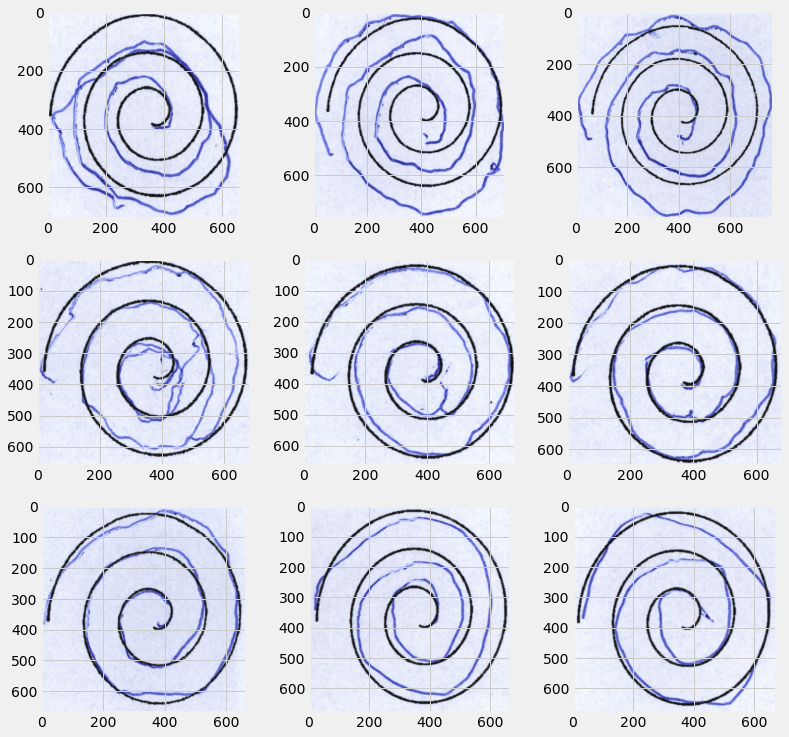

In [ ]:
fig=plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/dataset/parkinson/spiral/training/parkinson/"+
                  os.listdir("/content/gdrive/My Drive/dataset/parkinson/spiral/training/parkinson")[i])
    plt.imshow(img)   
fig.canvas.manager.set_window_title('Training Parkinson Spiral images')
plt.show()

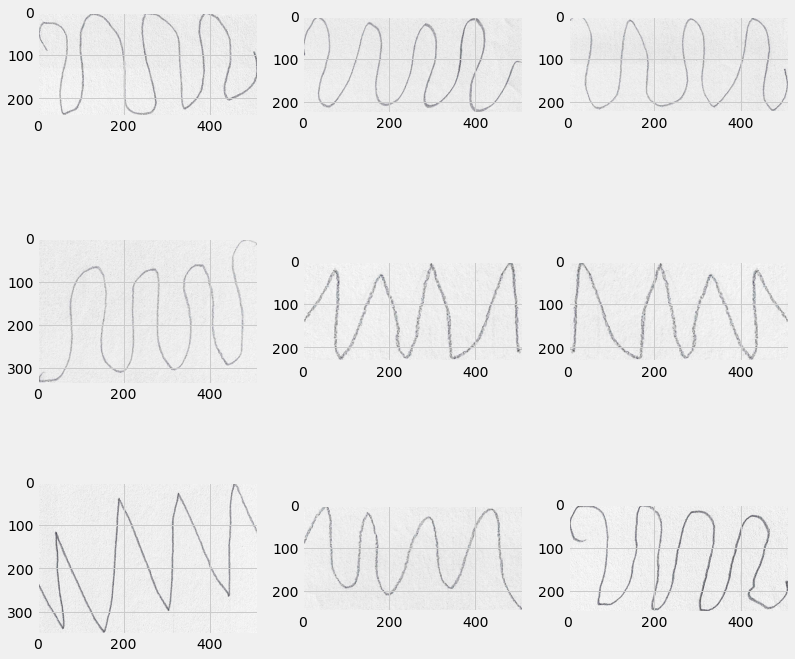

In [ ]:
fig=plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/dataset/parkinson/wave/training/healthy/"+
                  os.listdir("/content/gdrive/My Drive/dataset/parkinson/wave/training/healthy")[i])
    plt.imshow(img)   
fig.canvas.manager.set_window_title('Training Healthy Wave images')
plt.show()

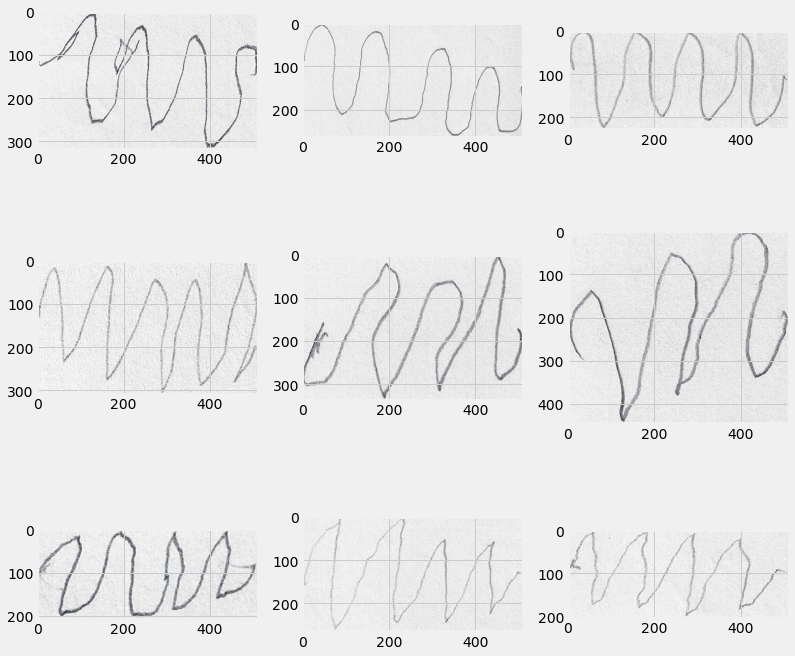

In [ ]:
fig=plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("/content/gdrive/My Drive/dataset/parkinson/wave/training/parkinson/"+
                  os.listdir("/content/gdrive/My Drive/dataset/parkinson/wave/training/parkinson")[i])
    plt.imshow(img)   
fig.canvas.manager.set_window_title('Training Parkinson Wave images')
plt.show()

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
from keras.layers import Conv2D,MaxPool2D

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
Vgg16 = Model(inputs=model.input, outputs=model.get_layer('vgg16').output)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True,
                                  featurewise_center=False, 
                                  samplewise_center=False,  
                                  featurewise_std_normalization=False,  
                                  samplewise_std_normalization=False,  
                                  zca_whitening=False,  
                                  rotation_range=90,                                   
                                  width_shift_range=0.1,  
                                  height_shift_range=0.1,                                    
                                  vertical_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
spiral_train_generator = train_datagen.flow_from_directory('/content/gdrive/My Drive/dataset/parkinson/spiral/training',
                                                   target_size = (224,224),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('/content/gdrive/My Drive/dataset/parkinson/spiral/testing',
                                                   target_size = (224,224),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

# %%
wave_train_generator = train_datagen.flow_from_directory('/content/gdrive/My Drive/dataset/parkinson/wave/training',
                                                   target_size = (224,224),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('/content/gdrive/My Drive/dataset/parkinson/wave/testing',
                                                   target_size = (224,224),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 440 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
from keras.optimizers import SGD
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/content/gdrive/My Drive/best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
history = model.fit_generator(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=30,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,verbose=1,callbacks=[mc,es])

Epoch 1/30
13/13 [==============================] - 11s 847ms/step - loss: 0.6737 - accuracy: 0.7475 - val_loss: 0.6887 - val_accuracy: 0.5625
Epoch 2/30
13/13 [==============================] - 11s 825ms/step - loss: 0.6708 - accuracy: 0.7598 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/30
13/13 [==============================] - 11s 809ms/step - loss: 0.6695 - accuracy: 0.7500 - val_loss: 0.6848 - val_accuracy: 0.5938
Epoch 4/30
13/13 [==============================] - 11s 813ms/step - loss: 0.6661 - accuracy: 0.7647 - val_loss: 0.6982 - val_accuracy: 0.4688
Epoch 5/30
13/13 [==============================] - 11s 818ms/step - loss: 0.6662 - accuracy: 0.7451 - val_loss: 0.6988 - val_accuracy: 0.4688
Epoch 6/30
13/13 [==============================] - 11s 816ms/step - loss: 0.6628 - accuracy: 0.7574 - val_loss: 0.6871 - val_accuracy: 0.5625
Epoch 7/30
13/13 [==============================] - 11s 819ms/step - loss: 0.6622 - accuracy: 0.7475 - val_loss: 0.6998 - val_accuracy: 0.4688

In [ ]:
model.load_weights("/content/gdrive/My Drive/best_model.h5")

In [ ]:
model.evaluate_generator(spiral_test_generator)

[0.6936147212982178, 0.5]

In [ ]:
List = history.history['accuracy']
print("Accuracy : ",List[len(List)-1])

Accuracy :  0.7598039507865906


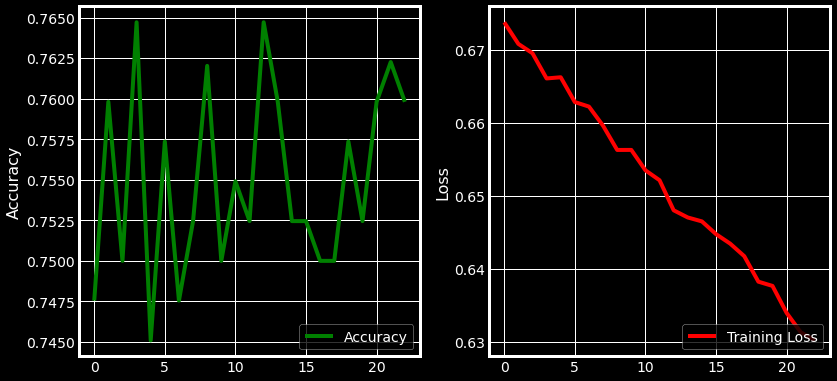

In [ ]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Accuracy', color = 'green')
plt.legend(loc='lower right')
fig.canvas.manager.set_window_title('Accuracy & Training Loss')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
plt.show()


In [ ]:
ess=EarlyStopping(monitor='accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mcc = ModelCheckpoint('/content/gdrive/My Drive/best_model2.h5', monitor='accuracy', mode='max', save_best_only=True)

In [ ]:
history2 = model.fit_generator(
        wave_train_generator,
        steps_per_epoch=wave_train_generator.n//wave_train_generator.batch_size,
        epochs=30,
        validation_data=wave_test_generator,
        validation_steps=wave_test_generator.n//wave_test_generator.batch_size,verbose=1,callbacks=[mcc,ess])

Epoch 1/30
2/2 [==============================] - 2s 753ms/step - loss: 0.6920 - accuracy: 0.5250
Epoch 2/30
2/2 [==============================] - 1s 173ms/step - loss: 0.6951 - accuracy: 0.4750
Epoch 3/30
2/2 [==============================] - 1s 844ms/step - loss: 0.6921 - accuracy: 0.5250
Epoch 4/30
2/2 [==============================] - 2s 624ms/step - loss: 0.6926 - accuracy: 0.5156
Epoch 5/30
2/2 [==============================] - 2s 880ms/step - loss: 0.6905 - accuracy: 0.5500
Epoch 6/30
2/2 [==============================] - 1s 837ms/step - loss: 0.6967 - accuracy: 0.4500
Epoch 7/30
2/2 [==============================] - 2s 612ms/step - loss: 0.6926 - accuracy: 0.5156
Epoch 8/30
2/2 [==============================] - 1s 597ms/step - loss: 0.6917 - accuracy: 0.5312
Epoch 9/30
2/2 [==============================] - 1s 179ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 10/30
2/2 [==============================] - 2s 681ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 11/30
2/2 [==

In [ ]:
List = history2.history['accuracy']
print("Accuracy : ",List[len(List)-1])

Accuracy :  0.4749999940395355


In [ ]:
model.load_weights("/content/gdrive/My Drive/best_model2.h5")

In [ ]:
model.evaluate_generator(wave_test_generator)

[0.6935870051383972, 0.5]

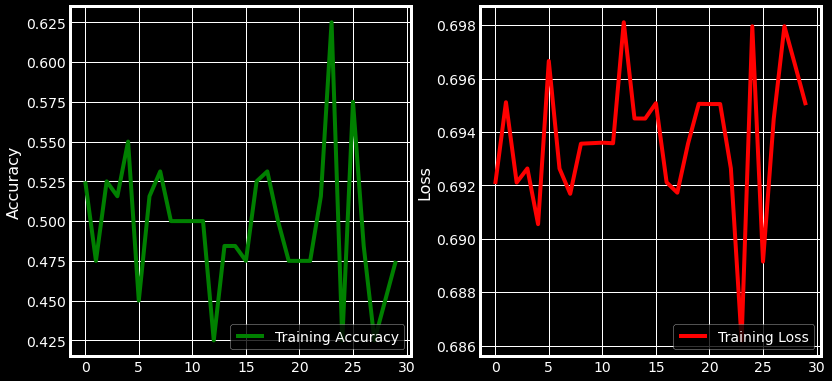

In [ ]:
plt.style.use('dark_background')
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history2.history['accuracy'], label='Training Accuracy', color = 'green')
plt.legend(loc='lower right')



plt.subplot(1,2,2)
plt.ylabel('Loss', fontsize=16)
plt.plot(history2.history['loss'], label='Training Loss', color = 'red')
plt.legend(loc='lower right')
fig.canvas.manager.set_window_title('Accuracy & Training Loss')
plt.show()
